Este código se baja en la guía de tensorflow para obtener un clasificador de imagenes
Para más referencias:
https://www.tensorflow.org/tutorials/images/classification?hl=es

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tqdm import tqdm
from os import listdir
from random import randint
import pathlib

Las clases a entrenar son: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'frogs', 'horse', 'sheep', 'spider', 'squirrel']
Cantidad de imagenes de entrenamiento: 8782
800


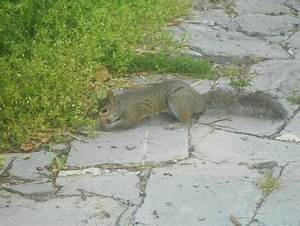

In [2]:
#Para los datos de entrenamiento

path_train = '../animal_classifier/dataset/train'
dir_list_train = listdir(path_train)
print('Las clases a entrenar son: ' + str(dir_list_train))

#Windows Path:
data_dir_train = pathlib.Path(path_train)

image_count_train = len(list(data_dir_train.glob('*/*.jpeg'))) +  len(list(data_dir_train.glob('*/*.jpg')))
print('Cantidad de imagenes de entrenamiento: ' + str(image_count_train))

#Direcciones de las imagenes de las diferentes clases

butterfly_train_path = list(data_dir_train.glob('butterfly/*'))
cat_train_path = list(data_dir_train.glob('cat/*'))
chicken_train_path = list(data_dir_train.glob('chicken/*'))
cow_train_path = list(data_dir_train.glob('cow/*'))
dog_train_path = list(data_dir_train.glob('dog/*'))
elephant_train_path = list(data_dir_train.glob('elephant/*'))
frogs_train_path = list(data_dir_train.glob('frogs/*'))
horse_train_path = list(data_dir_train.glob('horse/*'))
sheep_train_path = list(data_dir_train.glob('sheep/*'))
spider_train_path = list(data_dir_train.glob('spider/*'))
squirrel_train_path = list(data_dir_train.glob('squirrel/*'))
print(len(squirrel_train_path))

PIL.Image.open(str(squirrel_train_path[randint(0, len(squirrel_train_path))]))



Las clases de validación son: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'frogs', 'horse', 'sheep', 'spider', 'squirrel']
Cantidad de imagenes de entrenamiento: 2192


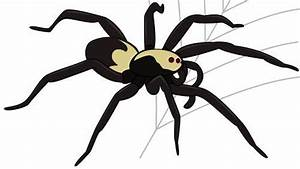

In [3]:
#Para los datos de validación

path_val = '../animal_classifier/dataset/validate'
dir_list_val = listdir(path_val)
print('Las clases de validación son: ' + str(dir_list_val))

#Windows Path:
data_dir_val = pathlib.Path(path_val)

image_count = len(list(data_dir_val.glob('*/*.jpeg'))) +  len(list(data_dir_val.glob('*/*.jpg')))
print('Cantidad de imagenes de entrenamiento: ' + str(image_count))

#Direcciones de las imagenes de las diferentes clases

butterfly_val_path = list(data_dir_val.glob('butterfly/*'))
cat_val_path = list(data_dir_val.glob('cat/*'))
chicken_val_path = list(data_dir_val.glob('chicken/*'))
cow_val_path = list(data_dir_val.glob('cow/*'))
dog_val_path = list(data_dir_val.glob('dog/*'))
elephant_val_path = list(data_dir_val.glob('elephant/*'))
frogs_val_path = list(data_dir_val.glob('frogs/*'))
horse_val_path = list(data_dir_val.glob('horse/*'))
sheep_val_path = list(data_dir_val.glob('sheep/*'))
spider_val_path = list(data_dir_val.glob('spider/*'))
squirrel_val_path = list(data_dir_val.glob('squirrel/*'))


PIL.Image.open(str(spider_val_path[randint(0, len(spider_val_path))]))

In [4]:
#Preparar datos 

batch_size = 32
img_height = 180
img_width = 180

#Entrenamiento
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names_train = train_ds.class_names
print('Clases de entrenamiento: ' + str(class_names_train))

#Validación

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_val,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names_val = val_ds.class_names
print('Clases de validación: ' + str(class_names_val))

num_classes = len(class_names_train)

Found 8800 files belonging to 11 classes.
Clases de entrenamiento: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'frogs', 'horse', 'sheep', 'spider', 'squirrel']
Found 2200 files belonging to 11 classes.
Clases de validación: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'frogs', 'horse', 'sheep', 'spider', 'squirrel']


(32, 180, 180, 3)
(32,)


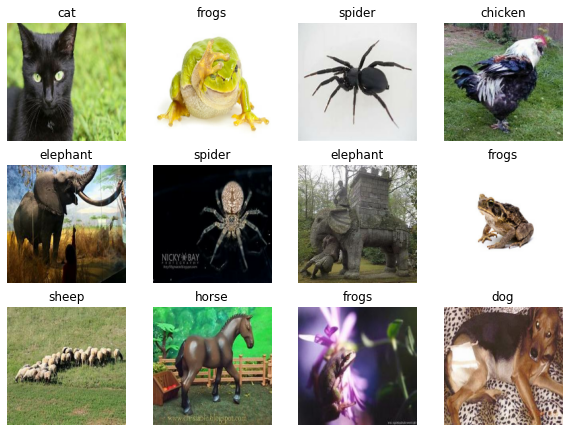

In [5]:
#Revisar las imagenes:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names_train[labels[i]])
        plt.axis("off")
    
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
#Se crea el modelo:

num_classes = len(class_names_train)
print('El número de clases son: ' + str(num_classes))

model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


El número de clases son: 11


In [ ]:
#Se entrena el modelo

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Resumen de nuestro modelo
model1.summary()

#Entrenamineto:
epochs1=5
history1 = model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
#Resultados

acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

epochs_range1 = range(epochs1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range1, acc1, label='Training Accuracy')
plt.plot(epochs_range1, val_acc1, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range1, loss1, label='Training Loss')
plt.plot(epochs_range1, val_loss1, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
#Para poder generalizar más el modelo

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [13]:
#Modelo número 2:
model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [16]:
epochs2 = 15
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs2
)

Epoch 1/15
275/275 [==============================] - 151s 540ms/step - loss: 2.1351 - accuracy: 0.2580 - val_loss: 1.8709 - val_accuracy: 0.3941
Epoch 2/15
275/275 [==============================] - 149s 543ms/step - loss: 1.7668 - accuracy: 0.3928 - val_loss: 1.5722 - val_accuracy: 0.4732
Epoch 3/15
275/275 [==============================] - 157s 570ms/step - loss: 1.6112 - accuracy: 0.4551 - val_loss: 1.5382 - val_accuracy: 0.4877
Epoch 4/15
275/275 [==============================] - 154s 561ms/step - loss: 1.5054 - accuracy: 0.4981 - val_loss: 1.4946 - val_accuracy: 0.5064
Epoch 5/15
275/275 [==============================] - 148s 538ms/step - loss: 1.3969 - accuracy: 0.5350 - val_loss: 1.4094 - val_accuracy: 0.5255
Epoch 6/15
275/275 [==============================] - 149s 541ms/step - loss: 1.3420 - accuracy: 0.5568 - val_loss: 1.3710 - val_accuracy: 0.5500
Epoch 7/15
275/275 [==============================] - 151s 548ms/step - loss: 1.2666 - accuracy: 0.5789 - val_loss: 1.3905 -

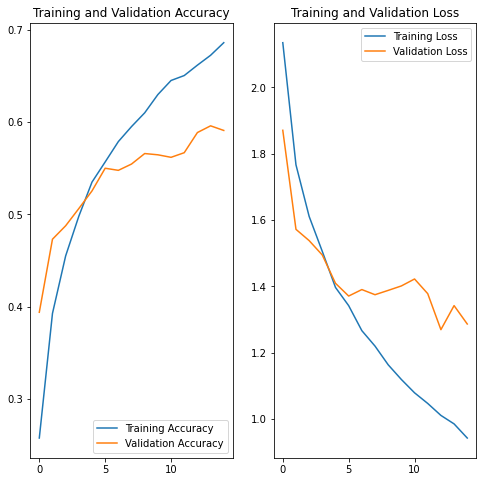

In [17]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range2 = range(epochs2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range2, acc2, label='Training Accuracy')
plt.plot(epochs_range2, val_acc2, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range2, loss2, label='Training Loss')
plt.plot(epochs_range2, val_loss2, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [20]:
#Predecir 
img_path = '../frog-dataset/data-raw/frog-7432.png'
img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names_train[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 23ms/step
This image most likely belongs to frogs with a 99.68 percent confidence.


In [21]:
#Se guarda el modelo

model2.save('../animal_sorter.h5')

In [11]:
#Se carga el modelo para asegurar que funcione bien

new_model = keras.models.load_model('../animal_sorter.h5')
img_height = 180
img_width = 180

#Predecir 
img_path = '../frog-dataset/data-raw/frog-7432.png'
#img_path = '../caballo-rana.jpeg'
#img_path = '../rana-caballo.jpeg'
#img_path = '../frog.jpg'
img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
print(img.size)
img_array = tf.keras.utils.img_to_array(img)
print(img_array.size)
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array)
predictions = new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names_train[np.argmax(score)], 100 * np.max(score))
)

(180, 180)
97200
tf.Tensor(
[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]], shape=(1, 180, 180, 3), dtype=float32)
1/1 [==============================] - 0s 78ms/step
This image most likely belongs to frogs with a 99.68 percent confidence.


In [15]:
#Se crea el modelo de Tensorflow Lite

converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the model.
with open('animal_detector.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\XPC\AppData\Local\Temp\tmpl3qbai5x\assets


INFO:tensorflow:Assets written to: C:\Users\XPC\AppData\Local\Temp\tmpl3qbai5x\assets
